About
The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on working place and maintain requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).



1) Problem statement.

OFLC gives job certification applications for employers seeking to bring foreign workers into the United States and grants certifications.
As In last year the count of employees were huge so OFLC needs Machine learning models to shortlist visa applicants based on their previous data.
In this project we are going to use the data given to build a Classification model:



This model is to check if Visa get approved or not based on the given dataset.
This can be used to Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the certain criteria which influences the decision.

# Importing Necesssary Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [62]:
# reading the data

df = pd.read_csv(r"C:\Ucsers\aahil\OneDrive\Desktop\US_Visa.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [63]:
# Data Inspection 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


Insights : 
    Seems like there are no NULL values

In [64]:
# Shape of the dataset
df.shape

(25480, 12)

In [65]:
# Display summary statistics for a dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


# EXPLORING DATA

Define numerical & categorical columns

In [66]:
numeric_features = [x for x in df.columns if df[x].dtypes != 'object']
numeric_features

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

In [67]:
categorical_features = [x for x in df.columns if df[x].dtype == 'object']
categorical_features

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [68]:
# proportion of count data on categorical columns
for x in categorical_features:
    print(df[x].value_counts(normalize=True) * 100)
    print('---------------------------')

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
---------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
---------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
---------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
---------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
---------------------------
region_of_employment
Northeast    2

Insights:

- case_id have unique vlaues for each column which can be dropped as it it of no importance
- continent column is highly biased towards Asia. hence we can combine other categories to form a single category.
- unit_of_wage seems to be an important column as most of them are yearly contracts.
- It can be inferred that the certification is tilted towards who does'nt require job training

Analysis of Numerical Features

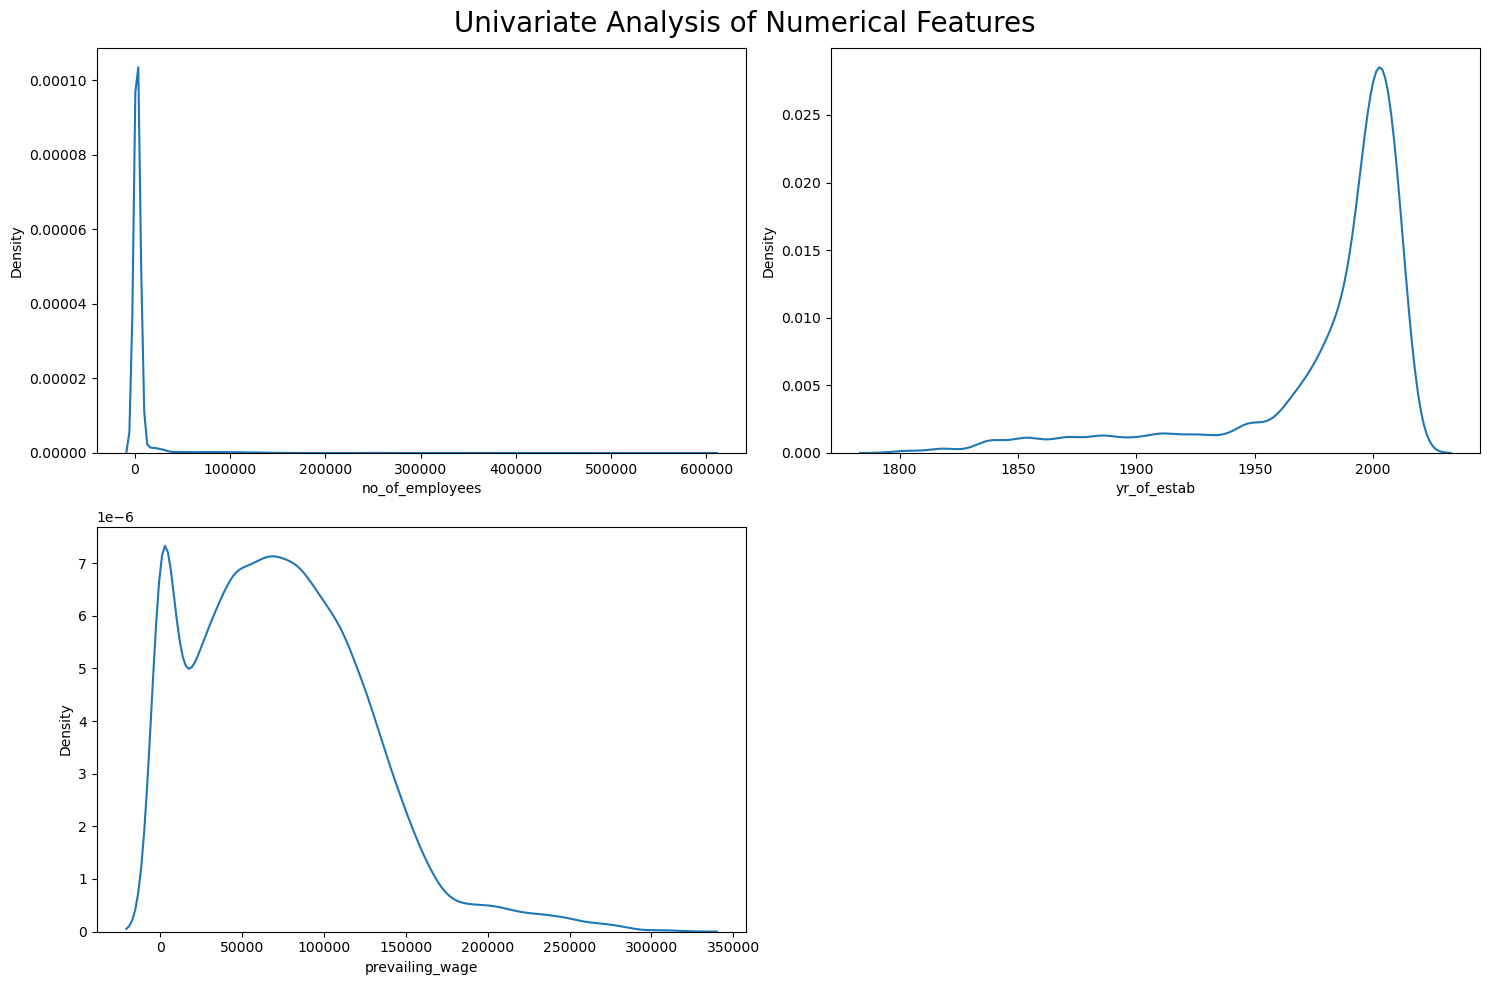

In [69]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize = 20)

for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

Insights:

- no_of_employees column looks more skewed but it may be because of outlies.
- yr_of_estab is a discrete feature.
- privailing-wage is a right-skewed distribution.

Analysis of Categorical Features

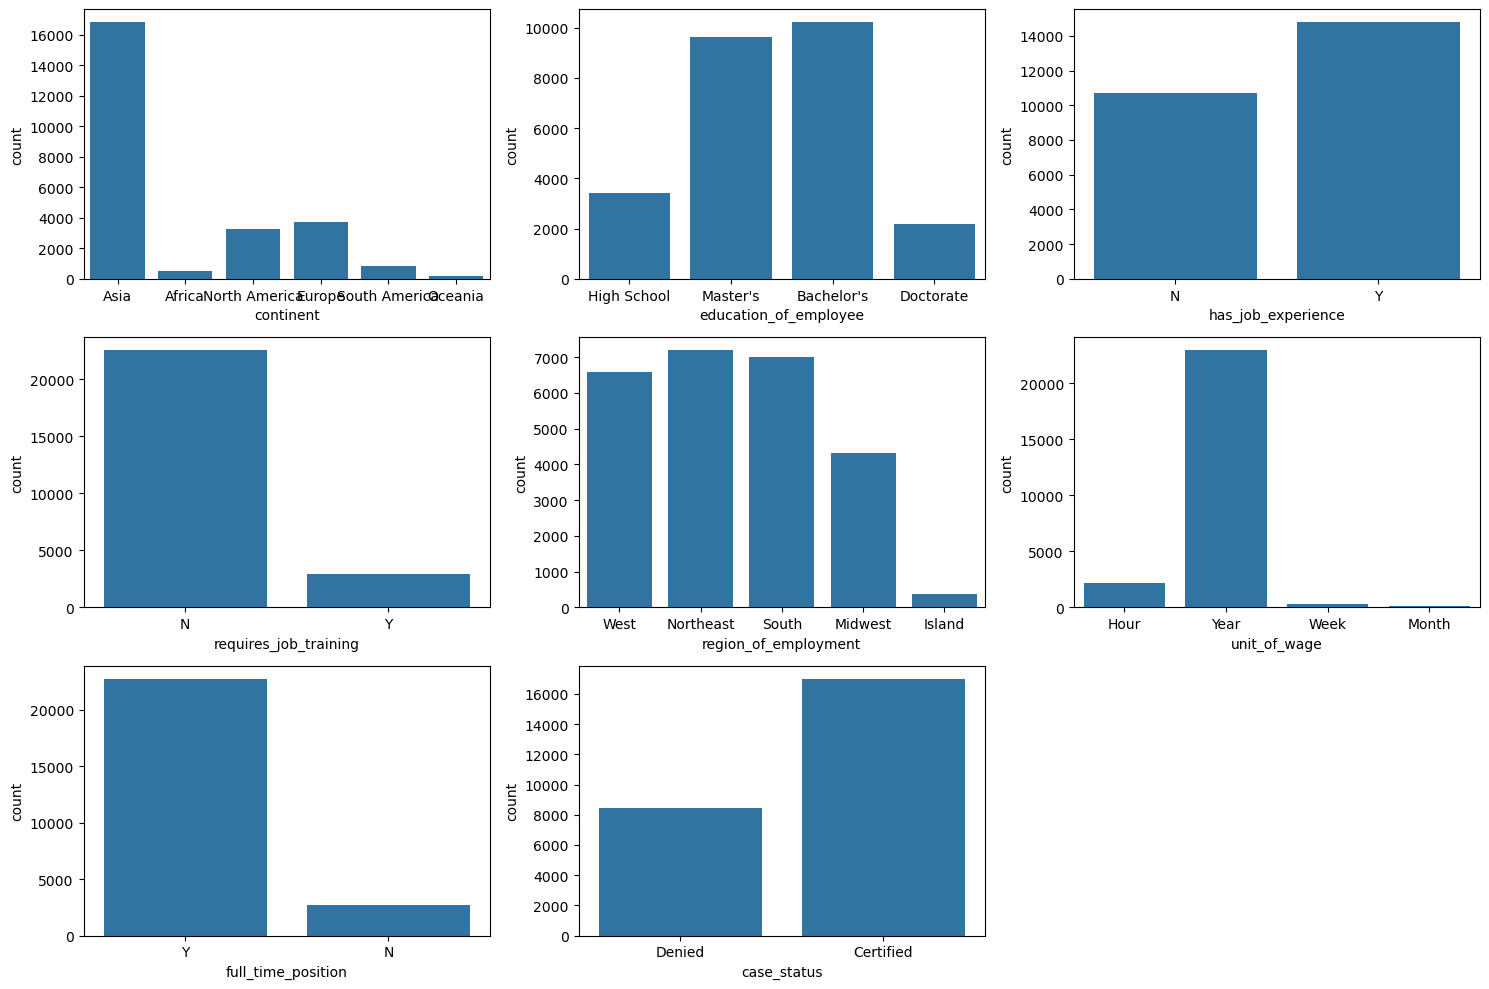

In [71]:
plt.figure(figsize=(15,10))

categorical_features.remove('case_id')       # case_id has alll unique number, hence of no use

for i in range (0, len(categorical_features)):
    plt.subplot(3,3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

Insights:

- requires_job_training, unit_of_wage, full_time_position and continents coulmns have single category dominating.
- Rest of the columns are more or less are balanced.

# Multivariate Analysis

In [72]:
discrete_features = [x for x in numeric_features if len(df[x].unique())<=25]
discrete_features

[]

In [81]:
continuous_features = [x for x in numeric_features if len(df[x].unique())>25]
continuous_features

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

# Check Multicollinearity for Categorical features Using Chi2 Test

In [179]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


# Insights:
- Here requires_job_training fails to Rejects Null Hypothesis which means it doesn't correlate with target column.

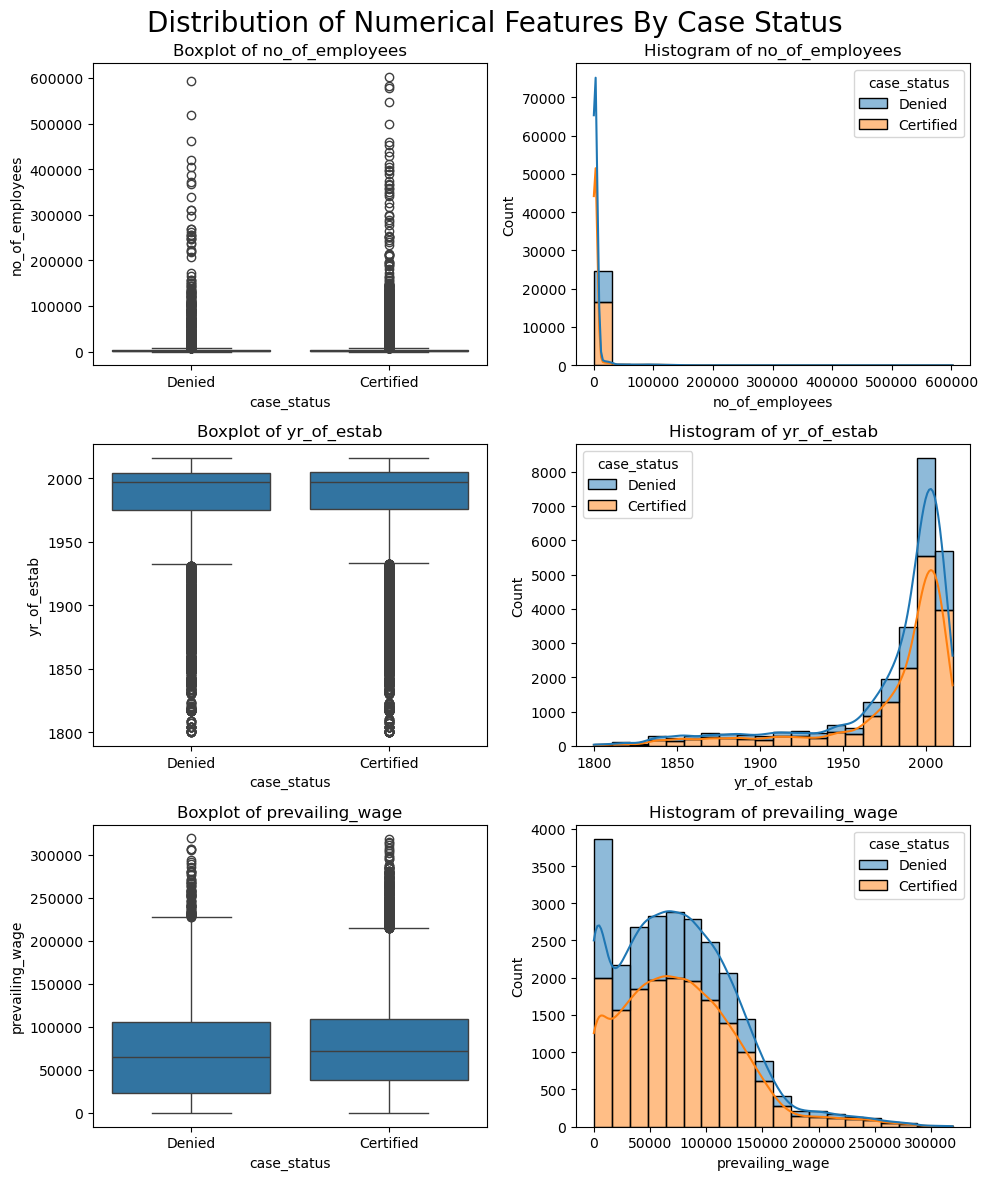

In [95]:
fig, ax = plt.subplots(3, 2, figsize=(10,12))

fig.suptitle('Distribution of Numerical Features By Case Status', fontsize=20)

for i, col in enumerate(continuous_features):   
    sns.boxplot(data=df, x='case_status', y=col, ax = ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}')
    
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True, 
                 multiple='stack', ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}')
fig.tight_layout()

Insights :
- No of Employees has many outliers which can be Handled in Feature Engineering and no_of_employees is Right Skewed.
- yr_of_estab is left skewed and some outliers below the lower bound of Box plot.
- prevailing_wage is right skewed with outliers above upper bound of box plot.
- There are No missing values in the dataset.
- The case_id column can be deleted because each row has unique values.
- The case_status column is the target to predict.
- In the Categorical column, features can be made Binary numerical in feature Encoding

# Visualization

# 4.1 Visualize the Target Feature

In [108]:
# Check the distribution of the target variable
print(df['case_status'].value_counts())

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64


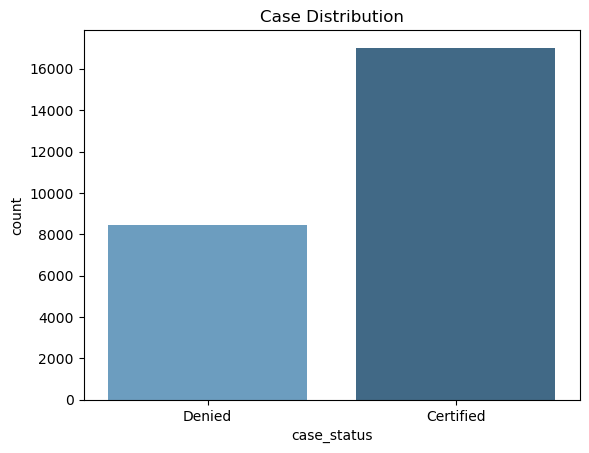

In [109]:
# Count plot using seaborn
sns.countplot (data=df, x='case_status',hue='case_status', palette='Blues_d')
plt.title('Case Distribution')
plt.show()

Insights :
- From the chart it is seen that the Target Variable is Imbalanced

# 4.2 Does Continent has any impact on applicant's Visa status ?

In [115]:
#group data by continent and their count of case_status
df.groupby('continent')['case_status'].value_counts(ascending=True).to_frame()

count
continent     case_status       
Africa        Denied         154
              Certified      397
Asia          Denied        5849
              Certified    11012
Europe        Denied         775
              Certified     2957
North America Denied        1255
              Certified     2037
Oceania       Denied          70
              Certified      122
South America Denied         359
              Certified      493

In [113]:
#group data by continent and their count of case_status
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

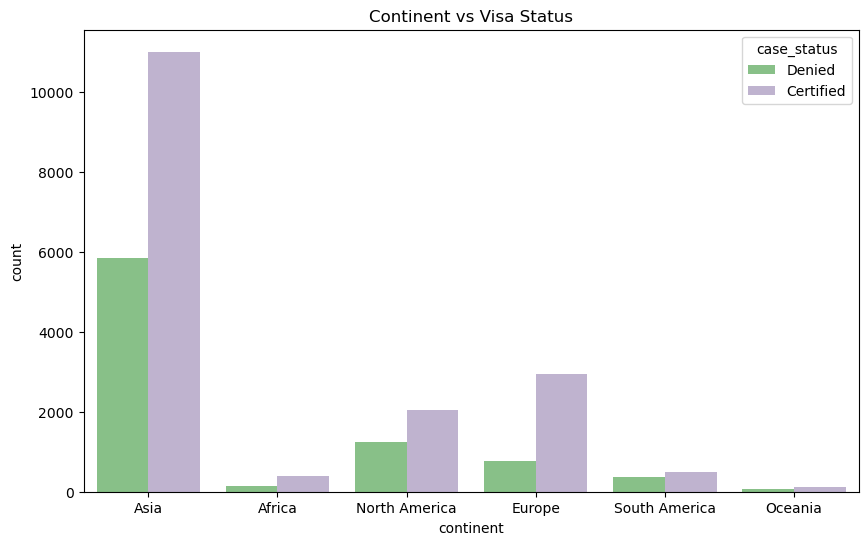

In [119]:
plt.subplots(figsize=(10,6))
sns.countplot(x="continent",hue="case_status", data=df, palette="Accent")
plt.title("Continent vs Visa Status")
plt.show()

Insights:

- As per the Chart, Asian applicants are applying far more than any other continents.
- Europe with 79% is having higher chance of getting their application certified 
- This is followed by Africa with 72% of Certified applications.
- Highest chance of getting certified if you are from Europe and followed by Africa and Asia respectively.

# 4.3 Does applicant education has any impact on Visa status ?

In [121]:
#group data by Education and their count of case_status
df.groupby('education_of_employee')['case_status'].value_counts(normalize = True).to_frame()*100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

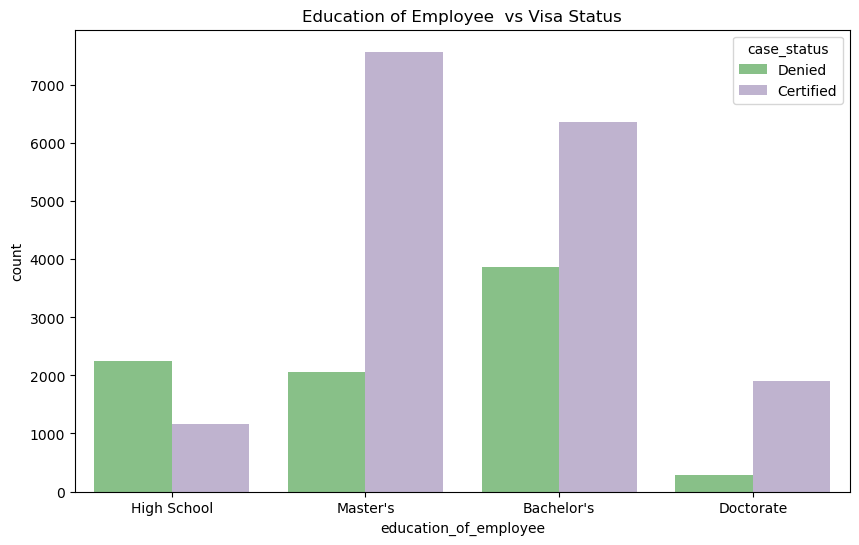

In [123]:
plt.subplots(figsize=(10,6))
sns.countplot(x="education_of_employee",hue="case_status", data=df, palette="Accent")
plt.title("Education of Employee  vs Visa Status")
plt.show()

Insights:

- It shows that the education status of an applicant has huge impact on one's certification
- Doctorate and Master's graduates have higher chance of being accepted then the others.

# 4.4 Does applicant's previous work experience has any impact on Visa status ?


In [124]:
#group data by has_job_experience and count case_status
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

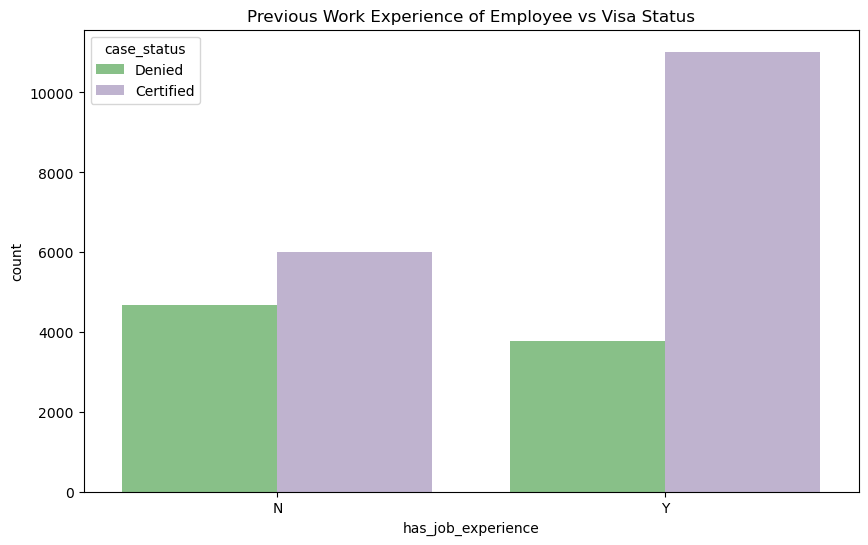

In [126]:
plt.subplots(figsize=(10,6))
sns.countplot(x="has_job_experience",hue="case_status", data=df, palette="Accent")
plt.title("Previous Work Experience of Employee vs Visa Status")
plt.show()

Insights:
-  74.5% people who are having previous work experience are being certified whereas on the other hand, only 56% of people with No
    previous work expeience are getting certified. 
- It means work experience do have effect on Visa status.
- And there is a slight edge for the people with work experiences then the fresheres as expected. But the difference is not huge.

# 4.5 If the Employee requires job training, does it have any impact on visa status?


In [127]:
#group data by requires_job_training and count case_status
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

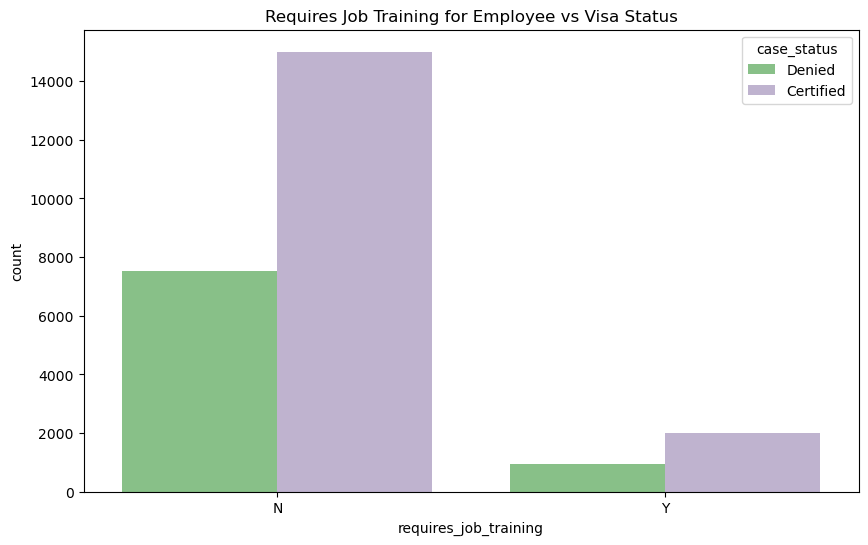

In [128]:
plt.subplots(figsize=(10,6))
sns.countplot(x="requires_job_training",hue="case_status", data=df, palette="Accent")
plt.title("Requires Job Training for Employee vs Visa Status")
plt.show()

Insights:

- 66% of applicant don't require job training.
- Even 67 % of people  who requires job training are getting certified.
- It can be inferred that this feature doesn't have much impact on target variable.

# 4.6 Does Number of employees of employer has any impact on Visa status?


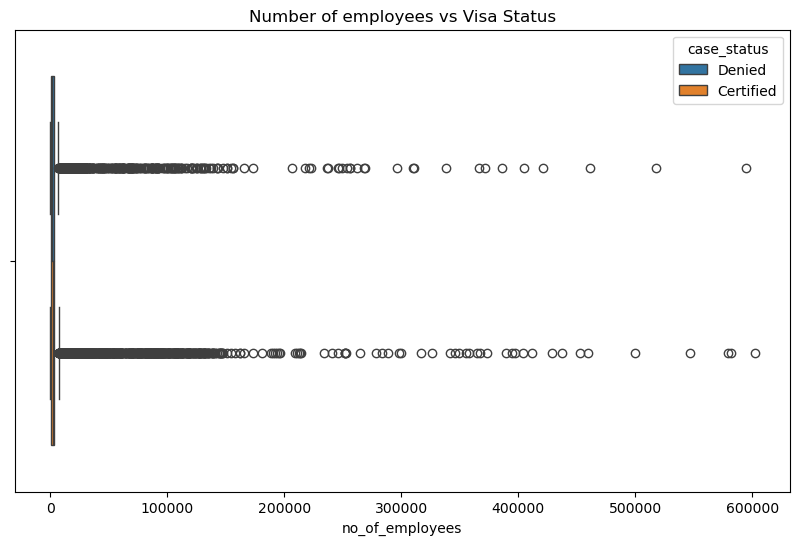

In [144]:
plt.subplots(figsize=(10,6))
sns.boxplot(x="no_of_employees",hue="case_status", data=df)
plt.title("Number of employees vs Visa Status")
plt.show()

Insights:

- The distrubution of both is similar. But there are outliers in both the classes which needs to be handeled.

# 4.7 Wages and its impact on Visa status


In [146]:
#group data by unit_of_wage and count the case_status
df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
unit_of_wage case_status            
Hour         Denied        65.368567
             Certified     34.631433
Month        Certified     61.797753
             Denied        38.202247
Week         Certified     62.132353
             Denied        37.867647
Year         Certified     69.885027
             Denied        30.114973

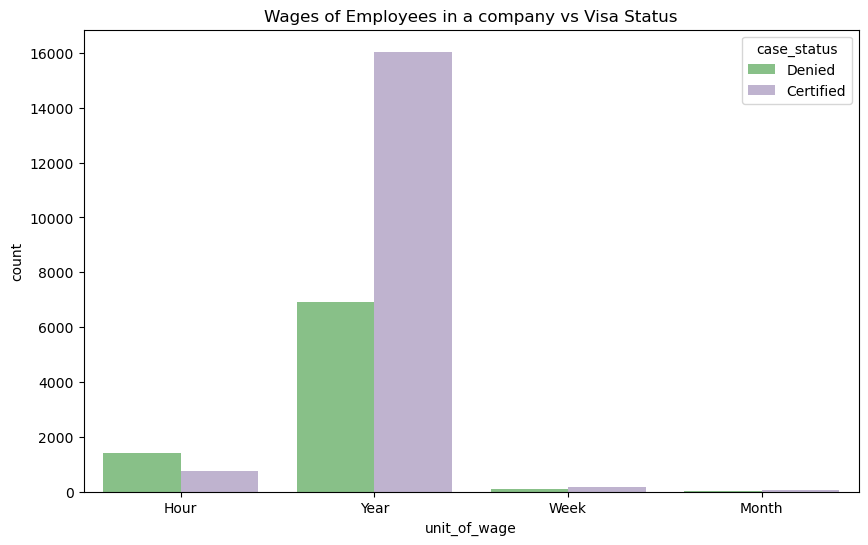

In [148]:
plt.subplots(figsize=(10,6))
sns.countplot(x="unit_of_wage",hue="case_status", data=df, palette="Accent")
plt.title("Wages of Employees in a company vs Visa Status")
plt.show()

Insights:

- For employees who applied for hourly pay 65% of them were denied.
- Almost 70% of the applicant who fall under the yearly wage category are getting accepted, which implies there is a 
    higher chance of yearly contract than other and immediately followed by week and month.

# 4.7 Does Region of employment has impact on Visa status ?


In [150]:
#group data by unit_of_wage and count the case_status
df.groupby('region_of_employment')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
region_of_employment case_status            
Island               Certified     60.266667
                     Denied        39.733333
Midwest              Certified     75.528210
                     Denied        24.471790
Northeast            Certified     62.904795
                     Denied        37.095205
South                Certified     70.015676
                     Denied        29.984324
West                 Certified     62.253265
                     Denied        37.746735

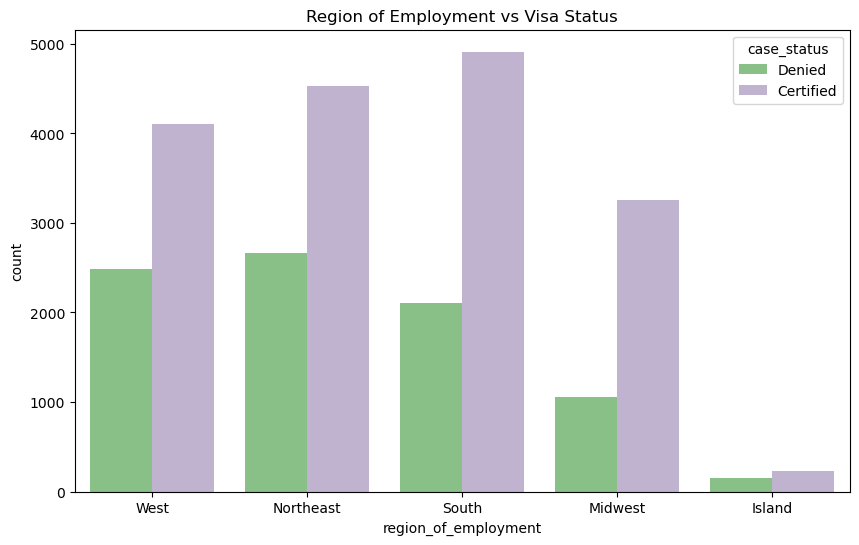

In [149]:
plt.subplots(figsize=(10,6))
sns.countplot(x="region_of_employment",hue="case_status", data=df, palette="Accent")
plt.title("Region of Employment vs Visa Status")
plt.show()

Insights:

- Southern region is hiring more compared to other regions followed by Northeast and West respectively.
- There is a slight edge for Midwest followed by South region.

# 4.8 Does Prevailing wage has any impact on Visa status ?


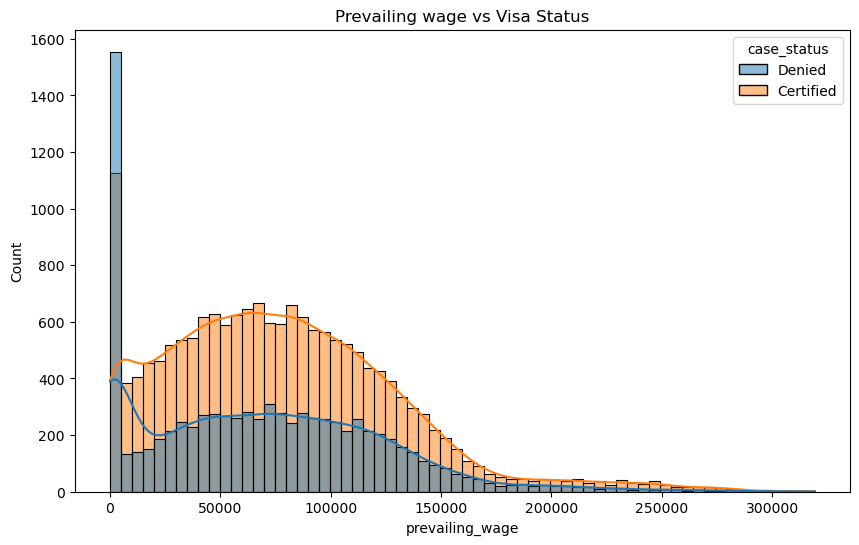

In [152]:
plt.subplots(figsize=(10,6))
sns.histplot(x="prevailing_wage",hue="case_status", data=df, kde=True)
plt.title("Prevailing wage vs Visa Status")
plt.show()

Insights:

The distribution of both the classes are same but needs to handle the outliers.

# 4.8.1 Prevailing wage based on Education

In [168]:
#group data by education_of_employee and count the prevailing_wage
df.groupby('education_of_employee')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)/1000

,prevailing_wage
education_of_employee,
Master's,78.843058
Bachelor's,73.405444
High School,71.582148
Doctorate,64.561077


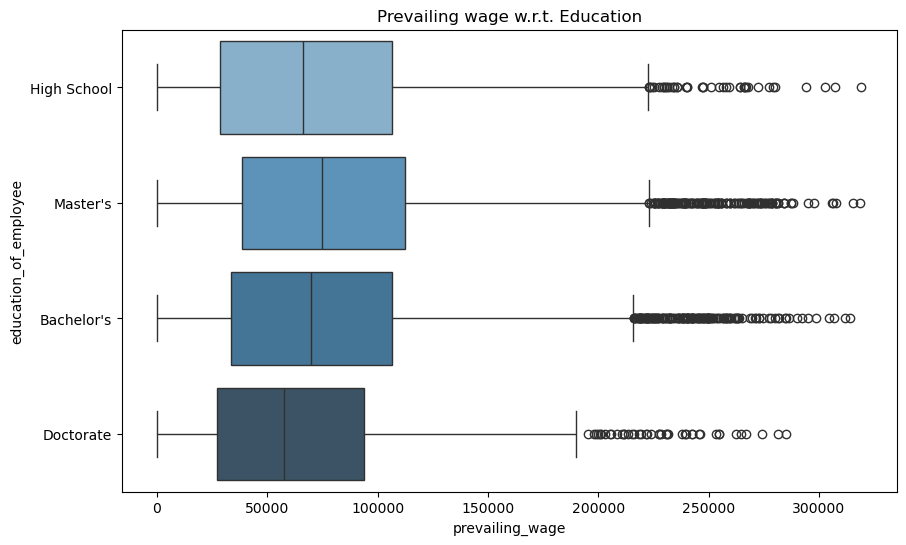

In [166]:
plt.subplots(figsize=(10,6))
sns.boxplot(x="prevailing_wage", y = "education_of_employee", data=df, palette = 'Blues_d')
plt.title("Prevailing wage w.r.t. Education")
plt.show()

Insights:

- Boxplot suggests that applicants with Master's degree has higher average prevailing wages.
- Applicants with Master's degree have median salary of $78.8k, which approximately 20% higher than Doctrate's average wage, which is strange.

# 4.8.2 Prevailing wage based on Job experience


In [170]:
df.groupby('has_job_experience')['prevailing_wage'].median().to_frame().sort_values(by='prevailing_wage',ascending=False)/1000

,prevailing_wage
has_job_experience,
N,72.602290
Y,69.033665


Insights:
    
- Suprisingly people who has less job experience has more prevailing wage.
- No job experience applicant has median prevailing wage as 72k USD.
- Previous job experience applicant has median prevailing wage as 69K USD.

# 4.9 Year of Establishment

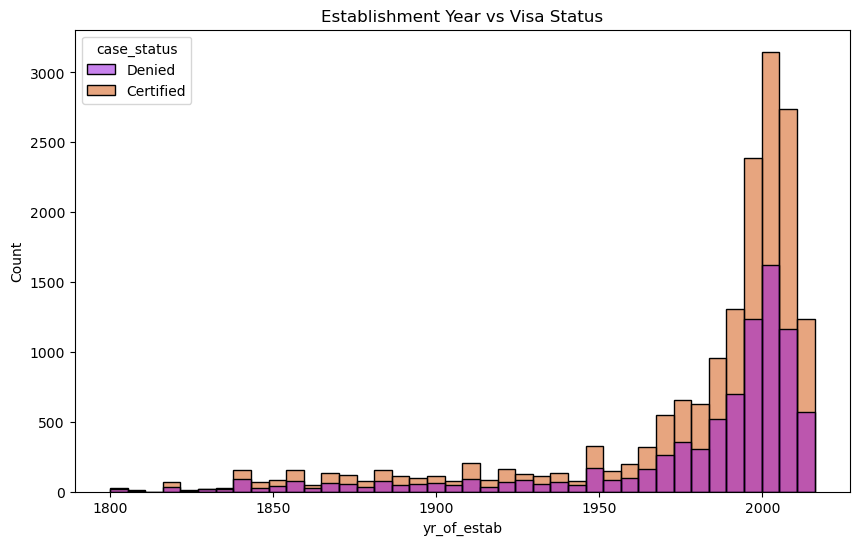

In [178]:
plt.subplots(figsize=(10,6))
sns.histplot(x = "yr_of_estab", data=df, palette='gnuplot', bins=40, hue='case_status')
plt.title("Establishment Year vs Visa Status")
plt.show()

Insights:
    
- Many companies were established around the year 2000, which could probably one of the many reasons for selecting or certifying more applicants from those companies.

Final Report:
    
- case_id column can be dropped as it is an ID.
- requires_job_training column can be dropped as it doesn't have much impact on target variable, Proved in visualization and chi2 test.
- no_of_employees, prevailing_wage columns have outllier which should be handled.
- Target column is imbalanced can be handled before model building.